# Task 1 - LULC tile location map

## General instructions

First, update the following cell to have a link to your Homework 4 GitHub repository

**UPDATE THIS LINK** https://github.com/h-hahn/eds220-hwk-4

Add comments for all your code and commit as needed. Err on the side of commenting and commiting too much for now.

## Overview
The goal of this task is to create a simple map showing the location of the LULC tile section we used in the previous discussion section relative to the state of California and Mount Whitney. 

## About the data

In this task you will use two datsets:

**First dataset**

A small section of the GAP/LANDFIRE National Terrestrial Ecosystems data for 2011, from the US Geological Survey (USGS). This is a raster file with a 30 m x 30 m pixel resolution. Each cell in the raster has a number representing the type of land cover.

The data was pre-processed in the Microsoft Planetary Computer to show a small region around Mount Whitney in California.

Further information about the dataset can be accessed via the the dataset’s Digital Object Identifier (DOI) link:

U.S. Geological Survey (USGS) Gap Analysis Project (GAP), 2016, GAP/LANDFIRE National Terrestrial Ecosystems 2011: U.S. Geological Survey data release, https://doi.org/10.5066/F7ZS2TM0.

**Second dataset**

A shapefile of CA Geographic Boundaries. 
This is a subset of the US Census Bureau's 2016 TIGER database, which only has the state boundary.
[https://data.ca.gov/dataset/ca-geographic-boundaries/resource/3db1e426-fb51-44f5-82d5-a54d7c6e188b](https://data.ca.gov/dataset/ca-geographic-boundaries/resource/3db1e426-fb51-44f5-82d5-a54d7c6e188b)

## File management
All your data files must be  inside a directory named 'data'  **in your gitignore**. 

## Data access
The .tif file (same as we used in discussion section) is in the Canvas-week7-homework zip file. The California shapefile will be directly accessed via its URL.

## FINAL CODE
You will use the next cell at the end of the task. Leave it blank for now.

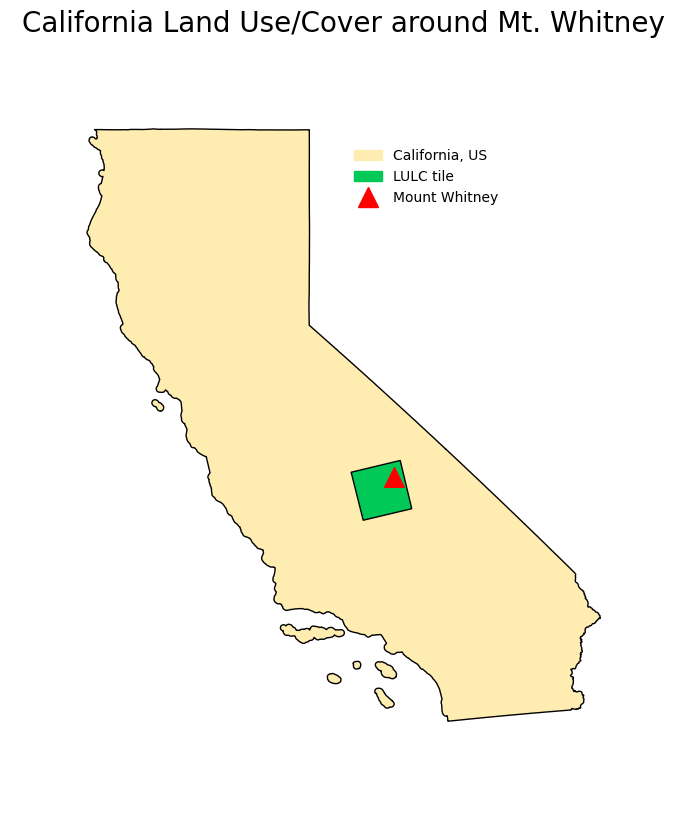

In [1]:
### ===== FINAL CODE =====

# import libraries and functions
import os
import geopandas as gpd
import rioxarray as rioxr
from shapely.geometry import Point
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from shapely.geometry import box

# import raster file as lulc
raster = os.path.join(os.getcwd(), 'data', 'land_cover.tif')
lulc = rioxr.open_rasterio(raster)

# import CA shapefile from URL
ca = gpd.read_file('https://data.ca.gov/dataset/e212e397-1277-4df3-8c22-40721b095f33/resource/3db1e426-fb51-44f5-82d5-a54d7c6e188b/download/ca-state-boundary.zip')

# get coordinates of lulc bounds
lulc_bounds = box(*lulc.rio.bounds())

# create geodataframe of bounding box
bbox = gpd.GeoDataFrame(geometry = [lulc_bounds], crs = lulc.rio.crs)

# change CRS of bounding box
bbox = bbox.to_crs("EPSG:3857")

# geodataframe of mt whitney coordinates
# mt whitney coordinates = 36.5785° N, 118.2923° W
# mt whitney xy coords = x,y = 13168238.600765156, 4380516.844251228
mt_whitney_coords = (-13168238.600765156, 4380516.844251228)
mt_whitney = gpd.GeoDataFrame(geometry = [Point(mt_whitney_coords)], crs="EPSG:3857")

# set axis
fig, ax = plt.subplots(figsize = (10,10))

# include title
ax.set_title('California Land Use/Cover around Mt. Whitney', fontsize = 20)
# remove axis lines
plt.axis('off')
# adjust margins
plt.margins(x = 0.15, y = 0.15)

# ----------------------------------------------------

# plot california
ca.plot(ax = ax,
       color = '#feecb1', # pale yellow color
       edgecolor = 'black') # add black border

# ----------------------------------------------------

# plot lulc bounding box
bbox.plot(ax = ax,
         color = '#00C957', # make it green
         edgecolor = 'black') # add black border to box

# ----------------------------------------------------

# plot mt whitney point
mt_whitney.plot(ax = ax, # set it on the correct axis
               marker = '^', # change marker to triangle
               color = 'red', # make marker red
               markersize = 200) # make triangle big 

# ----------------------------------------------------

# add mount whitney legend
red_triangle = mlines.Line2D([], [], color='red', 
                             marker='^',
                             markersize=15, 
                             label='Mount Whitney', 
                             linestyle = 'none')

# add california legend
yellow_patch = mpatches.Patch(color='#feecb1', 
                              label= 'California, US')

# add LULC legend
green_patch = mpatches.Patch(color = '#00C957', 
                             label = 'LULC tile')

ax.legend(handles = [yellow_patch, green_patch, red_triangle], 
          frameon=False, 
          loc='upper right', 
          bbox_to_anchor=(0.75, 0.875))

# ----------------------------------------------------

plt.show()


## Import libraries and functions

In [ ]:
# import libraries and functions
import os
import geopandas as gpd
import rioxarray as rioxr
from shapely.geometry import Point
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from shapely.geometry import box

## Import data
Use the next two cells to:

1. Import the raster file and store it in a variable `lulc` and take a look at it.
2. Import the CA shapefile directly from the URL using `gpd.read_file()` and take a look at it. You can get it by right-clicking on the "Download" button. Store it as a variable named `ca`.

In [ ]:
# 1 import raster file as lulc
raster = os.path.join(os.getcwd(), 'data', 'land_cover.tif')
lulc = rioxr.open_rasterio(raster)

# look at raster file
lulc.plot()

In [ ]:
# 2 import CA shapefile from URL
ca = gpd.read_file('https://data.ca.gov/dataset/e212e397-1277-4df3-8c22-40721b095f33/resource/3db1e426-fb51-44f5-82d5-a54d7c6e188b/download/ca-state-boundary.zip')

# look at shapefile
ca.head()

# look at crs of california data
print(ca.crs)

## Bounding box
Create a `geopanda.GeoDataFrame` named `bbox` with the lulc bounding box. 

EPSG:5070


<AxesSubplot:>

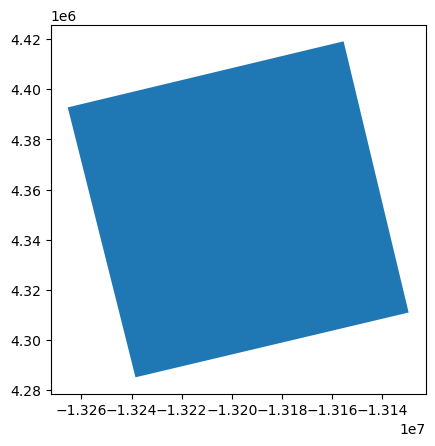

In [2]:
# check crs of lulc
print(lulc.rio.crs)

# get coordinates of lulc bounds
lulc_bounds = box(*lulc.rio.bounds())

# create geodataframe of bounding box
bbox = gpd.GeoDataFrame(geometry = [lulc_bounds], crs = lulc.rio.crs)

# change CRS of bounding box
bbox = bbox.to_crs("EPSG:3857")

# look at bounding box
bbox.plot()

## Mount Whitney point
Create a `geopanda.GeoDataFrame` named `mt_whitney` having the coordinates of Mount Whitney as a single point. You will need to look up Mount Whitney's coordinates. HINT: [`shapely.Point()`](https://shapely.readthedocs.io/en/stable/reference/shapely.Point.html)

In [ ]:
# geodataframe of mt whitney coordinates
# mt whitney coordinates = 36.5785° N, 118.2923° W
# mt whitney xy coords = x,y = 13168238.600765156, 4380516.844251228
mt_whitney_coords = (-13168238.600765156, 4380516.844251228)
mt_whitney = gpd.GeoDataFrame(geometry = [Point(mt_whitney_coords)], crs="EPSG:3857")

# check the gdf
mt_whitney

## Updates
If there are any updates needed to the data, perform them in the next cells (you may add as many as you need). 
At the top of each one, include a comment explaining what is happening in that cell's code.

In [ ]:
# your code here

## Map

Create a map showing `bbox`, `ca` and `mt_whitney` similar to the one in the overview section. 
It must have at least the customizations shown in the sample map. 

HINTS:
1. to change the `marker_style`: https://matplotlib.org/stable/gallery/lines_bars_and_markers/marker_reference.html
2. to add the marker to the legend: https://matplotlib.org/stable/users/explain/axes/legend_guide.html and update parameter `linestyle='None'` in `mlines.Line2D`

In [ ]:
# set axis
fig, ax = plt.subplots(figsize = (10,10))

# include title
ax.set_title('California Land Use/Cover around Mt. Whitney', fontsize = 20)
# remove axis lines
plt.axis('off')
# adjust margins
plt.margins(x = 0.15, y = 0.15)

# ----------------------------------------------------

# plot california
ca.plot(ax = ax,
       color = '#feecb1', # pale yellow color
       edgecolor = 'black') # add black border

# ----------------------------------------------------

# plot lulc bounding box
bbox.plot(ax = ax,
         color = '#00C957', # make it green
         edgecolor = 'black') # add black border to box

# ----------------------------------------------------

# plot mt whitney point
mt_whitney.plot(ax = ax, # set it on the correct axis
               marker = '^', # change marker to triangle
               color = 'red', # make marker red
               markersize = 200) # make triangle big 

# ----------------------------------------------------

# add mount whitney legend
red_triangle = mlines.Line2D([], [], color='red', 
                             marker='^',
                             markersize=15, 
                             label='Mount Whitney', 
                             linestyle = 'none')

# add california legend
yellow_patch = mpatches.Patch(color='#feecb1', 
                              label= 'California, US')

# add LULC legend
green_patch = mpatches.Patch(color = '#00C957', 
                             label = 'LULC tile')

ax.legend(handles = [yellow_patch, green_patch, red_triangle], 
          frameon=False, 
          loc='upper right', 
          bbox_to_anchor=(0.75, 0.875))

# ----------------------------------------------------

plt.show()


## Final code
Collect all the relevant code into the first blank cell of the notebook titled "FINAL CODE". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The only ouput of this cell should be the graph you produced in the previous exercise. 

Add divisions for relevant sections and comment appropriately.
